# Lab 02: Basic image image processing

The purpose of this lab is to introduce programs from FSL and AFNI for doing math on images in space and/or time. We will also learn how to summarize information you extract from an image into variables that you can then plot to help understand what just happened to the image.

## Preparation 
* import python tools for plotting
* learn how to make common plots of timeseries data that will be helpful later

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

Text(0,0.5,'ylabel')

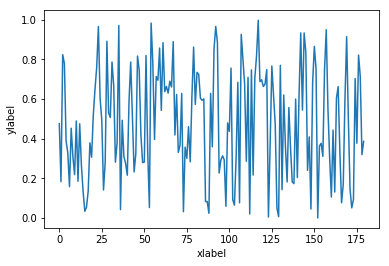

In [33]:
#the np below refers to the numpy toolbox we imported above and renamed to np
random_timeseries = np.random.rand(180,1)  #fill matrix with numbers, 180 cols by 1 row
#plt refers to the plt matplotlib toolbox we imported above and renamed to plt
plt.plot(random_timeseries) #plot the variable
plt.xlabel('xlabel')
plt.ylabel('ylabel')

(array([ 13.,  15.,  17.,  17.,  21.,  11.,  20.,  24.,  14.,  28.]),
 array([ 0.01522265,  0.11298784,  0.21075302,  0.30851821,  0.40628339,
         0.50404858,  0.60181376,  0.69957895,  0.79734413,  0.89510932,
         0.9928745 ]),
 <a list of 10 Patch objects>)

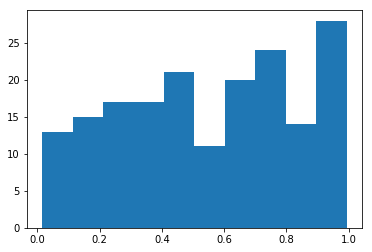

In [20]:
#plot a histogram
plt.hist(random_timeseries)

In [15]:
#getting help for commands within the notebook
plt.hist?

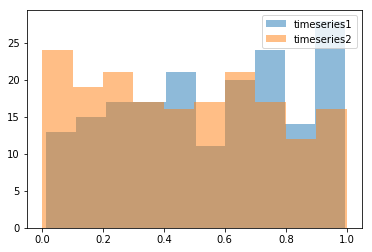

In [21]:
#can we show two histograms overlapping?
random_timeseries2 = np.random.rand(180,1) 
plt.hist(random_timeseries,alpha=.5,label='timeseries1')
plt.hist(random_timeseries2,alpha=.5,label='timeseries2')
plt.legend(loc='upper right')

### Practice: make a plot of the two timeseries we've made with a legend and x- and y- axes labeled as time and intensity respectively

Text(0,0.5,'intensity')

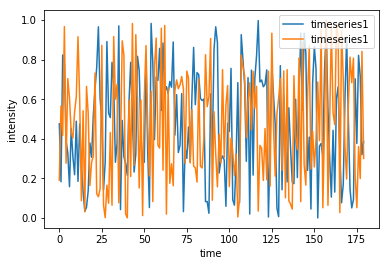

In [35]:
#Answer
plt.plot(random_timeseries,label='timeseries1') #plot the variable
plt.plot(random_timeseries2,label='timeseries1') #plot the variable
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('intensity')

## Introducing utilities to do math on images
* Scaling
* Thresholding
* Extract values with a mask
* Plot values extracted from an image in jupyter
    * Extracted from space in anatomical
    * Plot timeseries
* Export values to a separate file for work later

## Practice Problems